# Assignment8

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
from sklearn.model_selection import cross_validate

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

 **Task-1**

In [82]:
df = pd.read_csv("car_data.csv")
df
#df.info()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [83]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [84]:
df["Price"].astype(int)

0      17314
1      17542
2      16218
3      16336
4      16339
       ...  
799    16507
800    16175
801    15731
802    15118
803    13585
Name: Price, Length: 804, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


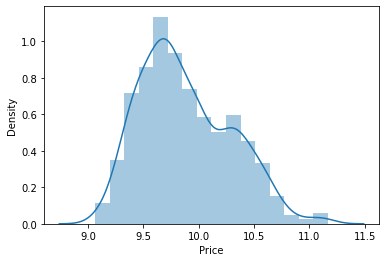

In [85]:
sns.distplot(np.log(df["Price"]))

In [86]:
df["Price"] = np.log(df["Price"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


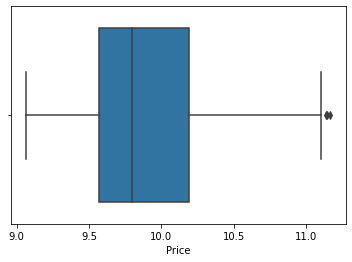

In [87]:
sns.boxplot(df["Price"]);

In [88]:
print(df['Price'].quantile(0.15))
print(df['Price'].quantile(0.95))
df['Price'] = np.where(df['Price'] < 39864,21343 , df['Price'])

9.450854595279786
10.59324649909984


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


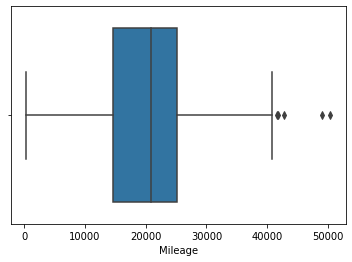

In [89]:
sns.boxplot(df["Mileage"]);

In [90]:
print(df['Mileage'].quantile(0.15))
print(df['Mileage'].quantile(0.95))
df['Mileage'] = np.where(df['Mileage'] < 32606,19832 , df['Mileage'])

10555.0
32606.399999999994


In [91]:
X = df[["Mileage"]].values
y = df[["Price"]].values

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

In [93]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_test_scaled,y_test)

1.0

In [94]:
ypred = lr.predict(X_test_scaled)

**Task**-**2**

In [95]:
x = df[["Mileage",'Cylinder','Liter', 'Doors', 'Cruise', 'Sound','Leather']].values
y = df[["Price"]].values

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=0)

In [97]:
scaler = StandardScaler()
scaler.fit(x_train,x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

1.0

In [98]:
ypred1 = lr.predict(x_test_scaled)

**Task -3**

In [99]:
df2 = df.drop(columns = ["Mileage",'Cylinder','Liter', 'Doors', 'Cruise', 'Sound','Leather',"Trim"])
df2

,Price,Make,Model,Type
0,21343.0,Buick,Century,Sedan
1,21343.0,Buick,Century,Sedan
2,21343.0,Buick,Century,Sedan
3,21343.0,Buick,Century,Sedan
4,21343.0,Buick,Century,Sedan
...,...,...,...,...
799,21343.0,Saturn,L Series,Sedan
800,21343.0,Saturn,L Series,Sedan
801,21343.0,Saturn,L Series,Sedan
802,21343.0,Saturn,L Series,Sedan


In [100]:
print(df["Make"].unique())
print(df["Model"].unique())
print(df["Type"].unique())

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'XLR-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt'
 'Corvette' 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am'
 'Grand Prix' 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO'
 '9-2X AWD' 'Ion' 'L Series']
['Sedan' 'Convertible' 'Hatchback' 'Coupe' 'Wagon']


In [119]:
df3 = pd.get_dummies(df2)
df3

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,Model_Bonneville,Model_CST-V,Model_CTS,Model_Cavalier,Model_Century,Model_Classic,Model_Cobalt,Model_Corvette,Model_Deville,Model_G6,Model_GTO,Model_Grand Am,Model_Grand Prix,Model_Impala,Model_Ion,Model_L Series,Model_Lacrosse,Model_Lesabre,Model_Malibu,Model_Monte Carlo,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,21343.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,21343.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,21343.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,21343.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,21343.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,21343.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
800,21343.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
801,21343.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
802,21343.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [114]:

X= df3.drop(columns = ["Price"]).values
y = df[["Price"]].values


array([[1.9832e+04, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.9832e+04, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.9832e+04, 6.0000e+00, 3.1000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [1.9832e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.9832e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.5662e+04, 6.0000e+00, 3.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=0)

In [116]:
scaler = StandardScaler()
scaler.fit(x_train,x_train)
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

1.0

In [117]:
ypred1 = lr.predict(x_test_scaled)